In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# IMPORT DATA AND DATA CLEANING

#DATA IMPORT
df = pd.read_csv('county_census_population.csv', thousands=',')
top_cities = pd.read_csv('top_ten_small_cities_US.csv', thousands = ',')

#RENAMING COLUMNS TO REMOVE SPACES
df.columns = [column.replace(" ", "_") for column in df.columns]

#REPLACING ABBREVATED STATE NAMES
df = df.replace(to_replace=["OH","PA","FL","MD","NY","TX","VA","NC","WI"], value=["Ohio","Pennsylvania","Florida","Maryland","New York","Texas","Virginia","North Carolina","Wisconsin"])

top_cities = top_cities.replace(to_replace=["IN","TX","MN","MA","WA","CA","VA","MD","KS","NC","MA","CO","VA","MN","OR","NJ","OH","NE","NC","PA"],
value=["Illinois","Texas","Minnesota","Massachusetts","Washington","California","Virginia","Maryland","Kansas","North Carolina","Massachusetts",
"Colorado","Virginia","Minnesota","Oregon","New Jersey","Ohio","Nebraska","North Carolina","Pennsylvania"]
)

#DROPPING NULL VALUES / EXTRA TEXT AT THE BOTTOM OF THE TOP CITIES ORIGINAL DATA SET
top_cities = top_cities.dropna()

#CONVERTING YEAR TO INT FROM TEXT TO ALLOW MERGING LATER
top_cities['Year'] = top_cities['Year'].astype(int)

#CONVERTING OBJECT TYPE STRING VALUES TO INT
# for x in df.columns[3:]:
#     df[x]=df[x].str.replace('-','0').str.replace(',','').astype(int)


In [4]:
# ADDED COLUMN WHICH ADDS MALE AND FEMALE POPULATIONS

df["total_population"] = df["female_total_population"] + df["male_total_population"]

#RENAMING COLUMNS
top_cities.columns = ['city','state','county_name','rank','year','city_population']

In [5]:
# CONVERTING CITY POPULATION DATA FROM OBJECT TO INT
#top_cities['city_population'] = top_cities['city_population'].str.replace(',','').astype(int)

In [6]:
df.head()

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
0,Stark County,Ohio,2010,192458,10596,12137,11559,11944,10981,10403,...,13518,14796,13518,11326,8768,5663,4749,"3,653","2,740",375128
1,Summit County,Ohio,2010,279312,15657,16216,17335,18173,17055,16776,...,19910,21220,19648,14670,9431,8645,6549,"5,239","3,144",541547
2,Trumbull County,Ohio,2010,108273,5858,6401,6835,6726,5425,5641,...,7203,8217,7000,7608,5782,3043,2536,"2,638","1,522",209719
3,Tuscarawas County,Ohio,2010,47232,2600,2459,3640,3073,2317,2979,...,3259,3666,2806,3259,1811,1811,1086,"1,132",634,92540
4,Warren County,Ohio,2010,105706,6765,7399,8985,6765,4440,5602,...,8921,7954,5589,6127,3547,2472,1827,"1,397",752,213192


In [7]:
top_cities.head()

,city,state,county_name,rank,year,city_population
0,Carmel,Illinois,Hamilton County,1.0,2012,80100.0
1,McKinney,Texas,Collin County,2.0,2012,136100.0
2,Eden Prairie,Minnesota,Hennepin County,3.0,2012,61200.0
3,Newton,Massachusetts,Middlesex County,4.0,2012,84700.0
4,Redmond,Washington,King County,5.0,2012,55200.0


In [8]:
#RIGHT JOIN ON TOTAL CENSUS DATA AND TOP CITIES DATA

merged_data = pd.merge(df, top_cities, on=['county_name','state'], how='right')

#DROPPING NULL VALUES - HAMILTON COUNTY DATA BECAUSE THIS DATA IS NOT PRESENT IN COUNTY CENSUS FILE
merged_data = merged_data.dropna()

In [9]:
merged_data

,county_name,state,year_x,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,city,rank,year_y,city_population
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,11622.0,6199.0,4262.0,"2,324","2,324",787605.0,McKinney,2.0,2012,136100.0
2,Collin County,Texas,2011.0,412655.0,28886.0,34663.0,31362.0,25585.0,20633.0,27235.0,...,13585.0,6393.0,4795.0,"1,998","2,397",811826.0,McKinney,2.0,2012,136100.0
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,13970.0,8629.0,4931.0,"2,876","2,465",833383.0,McKinney,2.0,2012,136100.0
4,Collin County,Texas,2013.0,434168.0,27815.0,35203.0,32595.0,29118.0,23034.0,25642.0,...,13446.0,9664.0,5462.0,"3,782","2,101",853923.0,McKinney,2.0,2012,136100.0
5,Collin County,Texas,2014.0,451388.0,27958.0,34271.0,35173.0,29762.0,25252.0,26154.0,...,15201.0,10858.0,6080.0,"3,040","2,606",885692.0,McKinney,2.0,2012,136100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Chester County,Pennsylvania,2011.0,256831.0,14881.0,15651.0,18986.0,18986.0,14112.0,13855.0,...,9398.0,7667.0,5441.0,"3,463","3,215",503907.0,West Goshen Township,10.0,2013,22421.0
109,Chester County,Pennsylvania,2012.0,258131.0,14699.0,17277.0,17277.0,18825.0,15215.0,13152.0,...,9948.0,7958.0,4974.0,"4,228","3,233",506833.0,West Goshen Township,10.0,2013,22421.0
110,Chester County,Pennsylvania,2013.0,258774.0,14477.0,17062.0,17062.0,17321.0,15769.0,13960.0,...,11042.0,8281.0,5270.0,"3,262","3,513",509727.0,West Goshen Township,10.0,2013,22421.0
111,Chester County,Pennsylvania,2014.0,260985.0,14311.0,16653.0,17434.0,17173.0,15872.0,14571.0,...,12124.0,7830.0,6062.0,"3,284","3,031",513312.0,West Goshen Township,10.0,2013,22421.0


In [10]:
#SINCE THERE ARE TWO YEAR COLUMNS AFTER THE MERGE, AS PER MY LOGIC KEEP THE RANK FOR ONLY THOSE ROWS WHERE THE YEARS MATCH

merged_data['rank'] = np.where(merged_data['year_x'] != merged_data['year_y'], 0, merged_data['rank'])

#DROPPING THE EXTRA YEAR COLUMN WHICH IS NO LONGER NEEDED
merged_data = merged_data.drop('year_y', axis = 1)



In [11]:
# RENAMING COLUMNS AGAIN AFTER THE MERGE
merged_data = merged_data.rename(columns= {'year_x':'year', 'total_population':'county_population'})


In [12]:
# INSERTING MISSING DATA USING INTERPOLATION FOR YEAR 2012

missing_row_reston = [['Fairfax County','Virginia', 2012, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,'Reston', 7, 60300]]
missing_row_vienna = [['Fairfax County','Virginia', 2012, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,'Vienna', 0, 60300]]
merged_data = merged_data.append(pd.DataFrame(missing_row_reston, columns=merged_data.columns)).sort_values('year').interpolate()
merged_data = merged_data.append(pd.DataFrame(missing_row_vienna, columns=merged_data.columns)).sort_values('year').interpolate()


In [13]:
#ADDING CUSTOM COLUMNS
merged_data["gender_ratio"] = (merged_data["male_total_population"] / merged_data["female_total_population"])

# ADDED % POPULATION OF COUNTY COLUMN AS PER REQUIREMENT NO 3 OF PART TWO
merged_data['percent_population_of_county'] = (merged_data['city_population']/merged_data['county_population']) * 100


In [14]:
merged_data

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,gender_ratio,percent_population_of_county
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,6199.0,4262.0,"2,324","2,324",787605.0,McKinney,0.0,136100.0,0.968068,17.280236
77,Washington County,Oregon,2010.0,270329.0,18634.0,19714.0,17284.0,15663.0,16204.0,21065.0,...,5495.0,3140.0,"2,879","2,879",532276.0,Sherwood,0.0,18736.0,0.968993,3.519978
65,Boulder County,Colorado,2010.0,147966.0,7671.0,9441.0,8409.0,11507.0,14015.0,8851.0,...,2215.0,2510.0,"1,034","1,476",295461.0,Louisville,0.0,18924.0,0.996817,6.404906
53,Orange County,North Carolina,2010.0,69501.0,2995.0,3621.0,4248.0,7034.0,8775.0,4736.0,...,1227.0,710.0,710,516,134058.0,Chapel Hill,0.0,59000.0,0.928864,44.010801
59,Norfolk County,Massachusetts,2010.0,350449.0,18592.0,22100.0,20346.0,21399.0,20346.0,21048.0,...,7718.0,7075.0,"7,075","4,502",671382.0,Sharon,0.0,17944.0,0.915777,2.672696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Orange County,North Carolina,2015.0,73215.0,2850.0,3727.0,3873.0,7745.0,9864.0,4676.0,...,2185.0,1297.0,888,546,141363.0,Chapel Hill,0.0,59000.0,0.930793,41.736522
112,Chester County,Pennsylvania,2015.0,262165.0,14157.0,15730.0,18089.0,18089.0,15992.0,14157.0,...,8375.0,5583.0,"4,314","3,045",515939.0,West Goshen Township,0.0,22421.0,0.967993,4.345669
64,Norfolk County,Massachusetts,2015.0,362771.0,18483.0,22107.0,19570.0,23194.0,21745.0,22107.0,...,12344.0,8674.0,"5,671","5,338",696051.0,Sharon,0.0,17944.0,0.918706,2.577972
12,Hennepin County,Minnesota,2015.0,618436.0,39659.0,37181.0,35321.0,34702.0,39040.0,53292.0,...,15690.0,10863.0,"7,242","8,449",1223720.0,Eden Prairie,0.0,61200.0,0.978733,5.001144


In [25]:
ranked_data = merged_data[(merged_data['rank'] != 0)]
ranked_data[['rank','year','county_name','state','gender_ratio']].sort_values(by='rank')

,rank,year,county_name,state,gender_ratio
62,1.0,2013.0,Norfolk County,Massachusetts,0.923101
68,2.0,2013.0,Boulder County,Colorado,0.996103
3,2.0,2012.0,Collin County,Texas,0.970578
38,3.0,2013.0,Fairfax County,Virginia,0.980301
9,3.0,2012.0,Hennepin County,Minnesota,0.968924
15,4.0,2012.0,Middlesex County,Massachusetts,0.948306
74,4.0,2013.0,Carver County,Minnesota,0.979390
80,5.0,2013.0,Washington County,Oregon,0.968676
21,5.0,2012.0,King County,Washington,0.996474
27,6.0,2012.0,Orange County,California,0.978006


In [15]:

# CREATING A NEW DATAFRAME FOR FAIRFAX COUNTY DATA
fairfax_county = merged_data[(merged_data.county_name == 'Fairfax County')]
fairfax_county


,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,gender_ratio,percent_population_of_county
36,Fairfax County,Virginia,2010.0,549398.0,35747.0,35747.0,35197.0,31897.0,29147.0,40146.0,...,11809.0,7515.0,"5,368","4,831",1086730.0,Vienna,0.0,16285.0,0.978038,1.498532
31,Fairfax County,Virginia,2010.0,549398.0,35747.0,35747.0,35197.0,31897.0,29147.0,40146.0,...,11809.0,7515.0,"5,368","4,831",1086730.0,Reston,0.0,60300.0,0.978038,5.548756
32,Fairfax County,Virginia,2011.0,555959.0,36137.0,37249.0,34469.0,33358.0,28354.0,39473.0,...,12529.0,8171.0,"5,992","3,813",1099603.0,Reston,0.0,60300.0,0.977849,5.483797
37,Fairfax County,Virginia,2011.0,555959.0,36137.0,37249.0,34469.0,33358.0,28354.0,39473.0,...,12529.0,8171.0,"5,992","3,813",1099603.0,Vienna,0.0,16285.0,0.977849,1.480989
0,Fairfax County,Virginia,2012.0,281940.5,18321.5,19583.0,19314.0,17194.5,15476.5,20284.5,...,6531.0,4352.0,NaN,NaN,553797.0,Reston,7.0,60300.0,0.964234,10.888466
0,Fairfax County,Virginia,2012.0,162287.0,10857.5,11642.0,10922.0,9948.5,9334.5,11443.5,...,3531.5,2442.0,NaN,NaN,320801.5,Vienna,0.0,60300.0,0.976754,18.796670
38,Fairfax County,Virginia,2013.0,570804.0,37102.0,38244.0,35390.0,34819.0,31394.0,38244.0,...,12883.0,9522.0,"5,601","4,481",1130364.0,Vienna,3.0,16285.0,0.980301,1.440686
33,Fairfax County,Virginia,2013.0,570804.0,37102.0,38244.0,35390.0,34819.0,31394.0,38244.0,...,12883.0,9522.0,"5,601","4,481",1130364.0,Reston,0.0,60300.0,0.980301,5.334565
39,Fairfax County,Virginia,2014.0,575282.0,37319.0,37893.0,35596.0,35022.0,33300.0,37319.0,...,14649.0,9578.0,"5,634","5,634",1138123.0,Vienna,0.0,16285.0,0.978374,1.430865
34,Fairfax County,Virginia,2014.0,575282.0,37319.0,37893.0,35596.0,35022.0,33300.0,37319.0,...,14649.0,9578.0,"5,634","5,634",1138123.0,Reston,0.0,60300.0,0.978374,5.298197


In [16]:
#GREENE COUNTY DATA SET

greene_county = df[(df.county_name == 'Greene County') & (df.state == 'Ohio')]

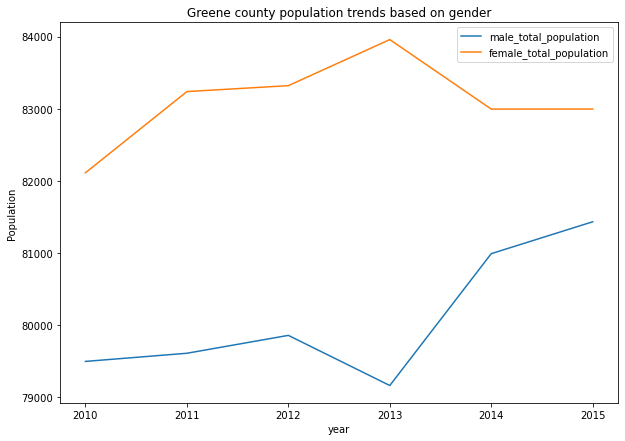

In [17]:
greene_county.plot.line('year',['male_total_population','female_total_population'], figsize = (10,7))
plt.title('Greene county population trends based on gender')
plt.ylabel('Population')
plt.show()

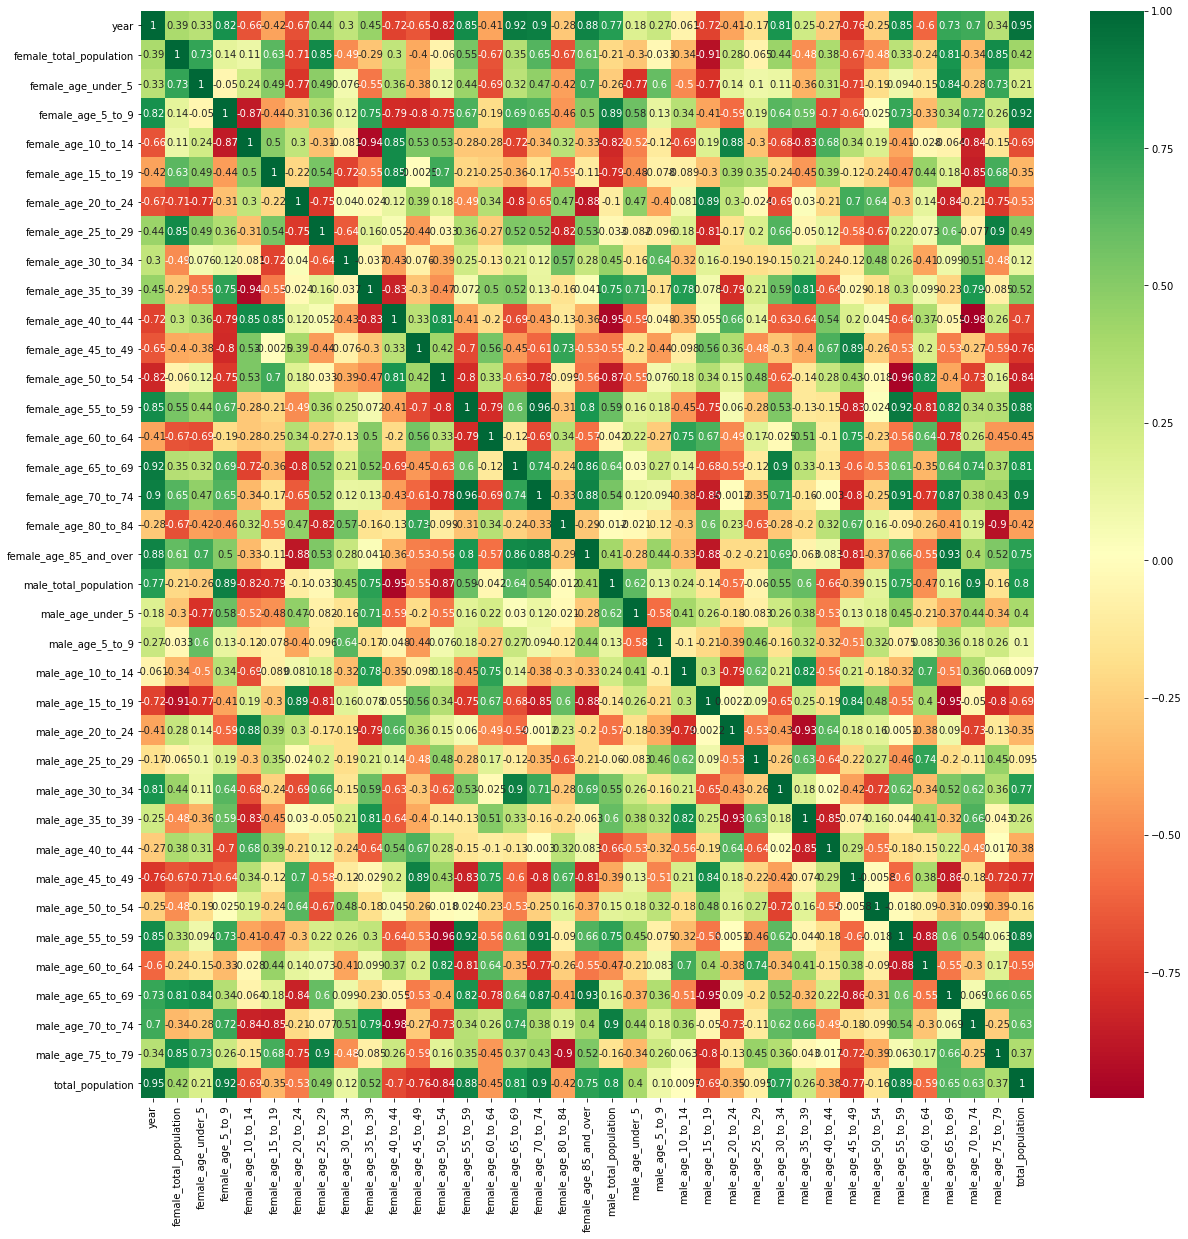

In [18]:
# CORRELATION MATRIX FOR GREENE COUNTY

plt.subplots(figsize=(20,20))
sns.heatmap(greene_county.corr(), annot=True, cmap='RdYlGn')
plt.show()
